In [51]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
import geopandas as gpd

sys.path.append(os.path.abspath('../Data'))

from fetch_data import fetch_data

In [36]:
data = fetch_data()
__path__ = os.path.join(os.getcwd(),'../Data/gadm41_COL_2.shp')
colombia_map = gpd.read_file(__path__)

Datos recibidos correctamente.


In [37]:
df =  pd.DataFrame(data)
df = df[df['a_o']=='2023']
print(df.columns)
df['anio'] = pd.to_numeric(df['a_o'], errors ='coerce')
df['irca_2'] = pd.to_numeric(df['irca'], errors ='coerce')
df['ircaurbano_2'] = pd.to_numeric(df['ircaurbano'], errors ='coerce')
df['ircarural_2'] = pd.to_numeric(df['ircarural'], errors ='coerce')
df.describe()


Index(['departamentocodigo', 'departamento', 'municipiocodigo', 'municipio',
       'a_o', 'irca', 'nivel_de_riesgo', 'ircaurbano',
       'nivel_de_riesgo_urbano', 'ircarural', 'nivel_de_riesgo_rural'],
      dtype='object')


,anio,irca_2,ircaurbano_2,ircarural_2
count,1009.0,1009.000000,997.000000,470.000000
mean,2023.0,11.019921,8.543932,25.168085
std,0.0,14.920204,13.634147,28.044593
min,2023.0,0.000000,0.000000,0.000000
25%,2023.0,1.500000,0.500000,2.400000
50%,2023.0,5.100000,3.000000,14.000000
75%,2023.0,14.800000,10.100000,39.525000
max,2023.0,97.900000,90.200000,100.000000


In [38]:
statm, p  = shapiro(df['irca_2'])
if p > 0.005:
    print('datos con distribucion normal')
else: 
    print('los datos no cuentan con una distribucion normal')

los datos no cuentan con una distribucion normal


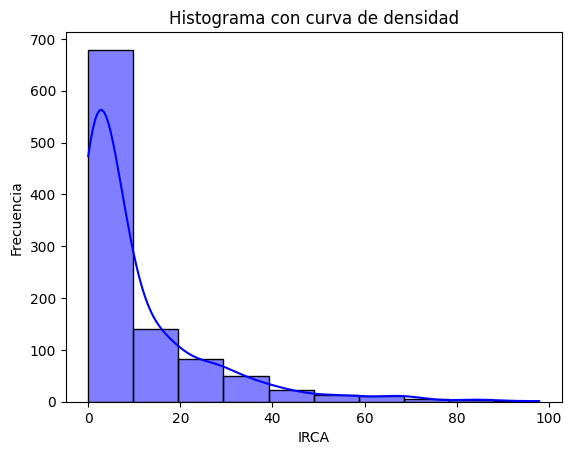

In [39]:
fig, ax = plt.subplots()
sns.histplot(df['irca_2'], kde=True, bins=10, color='blue')
plt.xlabel('IRCA')
plt.ylabel('Frecuencia')
plt.title('Histograma con curva de densidad')
plt.show()

/tmp/ipykernel_7861/2702106348.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


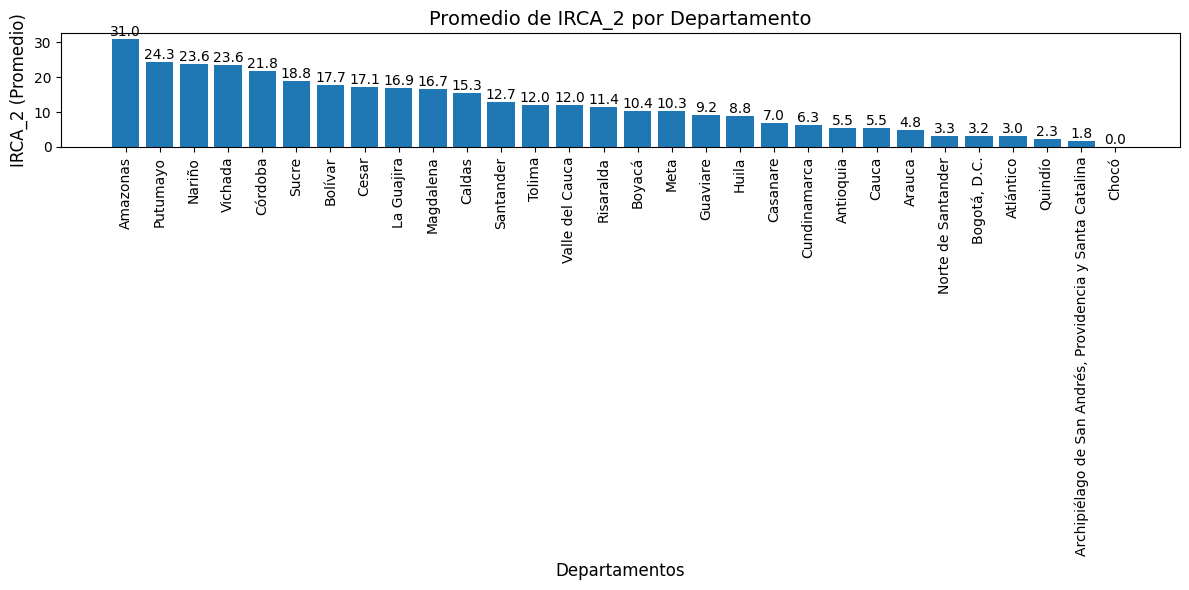

In [41]:
result = df[['departamento','irca_2','ircaurbano_2','ircarural_2']].groupby('departamento').mean()
result_sorted = result.sort_values(by="irca_2", ascending=False)

fig, ax = plt.subplots(figsize=(12,6), layout = 'constrained')
bars = ax.bar(result_sorted.index, result_sorted['irca_2'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=10, color='black')

ax.set_xlabel('Departamentos', fontsize=12)
ax.set_ylabel('IRCA_2 (Promedio)', fontsize=12)
ax.set_title('Promedio de IRCA_2 por Departamento', fontsize=14)
ax.tick_params(axis='x', rotation=90) 
plt.tight_layout()

In [42]:
df[['departamento','municipio','irca_2','ircaurbano_2','ircarural_2']].groupby(['departamento','municipio']).mean()

irca_2  ircaurbano_2  ircarural_2
departamento    municipio                                       
Amazonas        #TODOS           25.5          25.5          NaN
                Leticia          23.2          23.2          NaN
                Puerto Nariño    44.3          44.3          NaN
Antioquia       #TODOS            5.4           2.3         14.1
                Abejorral         0.5           0.5          NaN
...                               ...           ...          ...
Valle del Cauca Yumbo             8.3           5.4         12.6
                Zarzal            0.0           0.0          0.0
Vichada         #TODOS           21.1          21.1          NaN
                La Primavera      6.1           6.1          NaN
                Santa Rosalía    43.6          43.6          NaN

[1009 rows x 3 columns]

<Axes: xlabel='irca_2', ylabel='ircarural_2'>

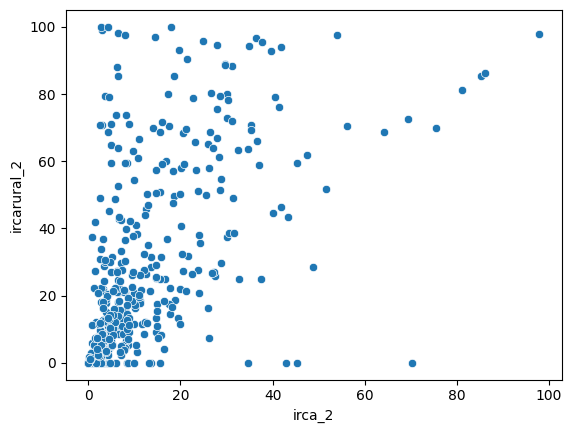

In [43]:
sns.scatterplot(data=df, x='irca_2', y='ircarural_2')

<Axes: xlabel='irca_2', ylabel='ircaurbano_2'>

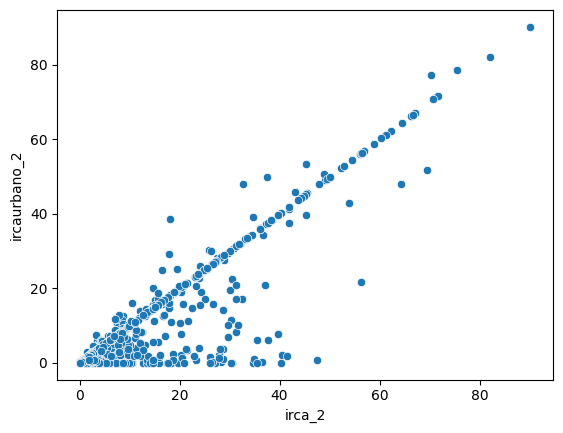

In [44]:
sns.scatterplot(data=df, x='irca_2', y='ircaurbano_2')

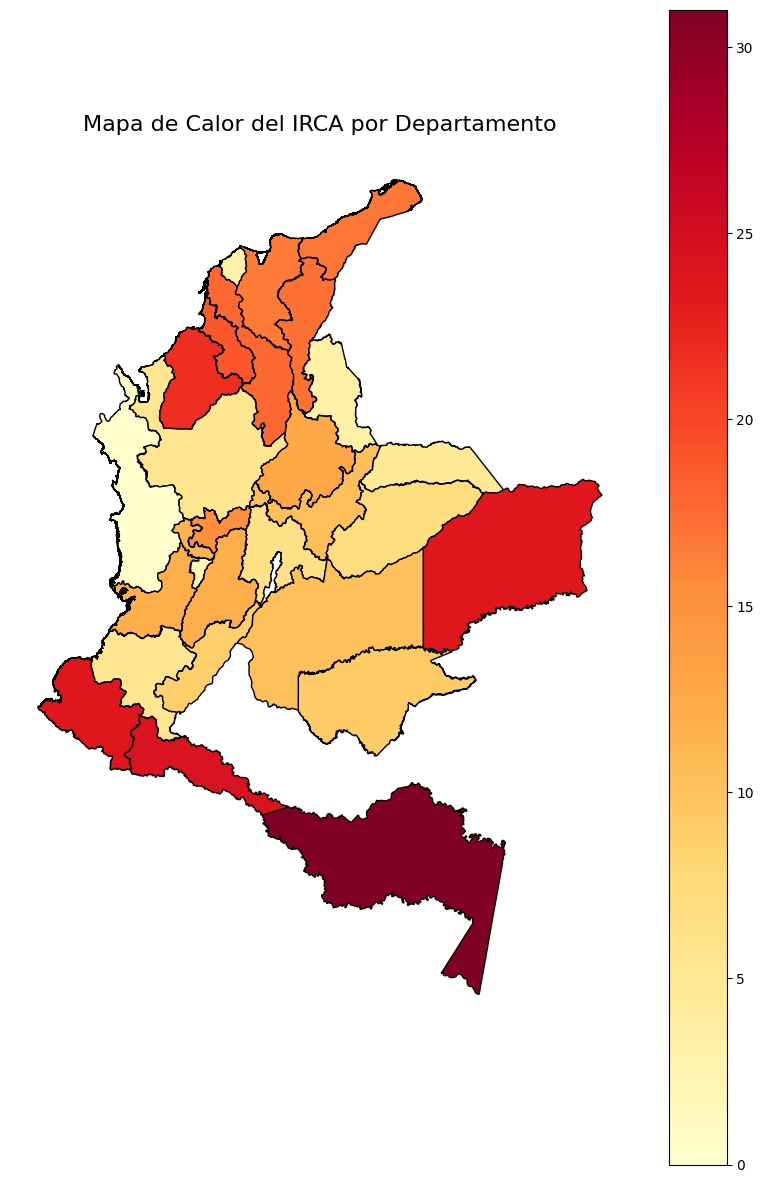

In [45]:
colombia_departamentos = colombia_map.dissolve(by='NAME_1', as_index=False)

colombia_departamentos = colombia_departamentos.merge(result, left_on='NAME_1',right_on='departamento', how='left')

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
colombia_departamentos.plot(column='irca_2', cmap='YlOrRd', legend=True, ax=ax, edgecolor='black')

# Títulos y configuración
ax.set_title("Mapa de Calor del IRCA por Departamento", fontsize=16)
ax.axis('off')

# Mostrar el mapa
plt.show()